In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = np.loadtxt('/content/drive/MyDrive/Data/Pattern/train-perceptron.txt')

Mounted at /content/drive


In [ ]:
#Separating Class 1
class_1=np.array([row for row in data if row[2]==1])

#Separating Class 2
class_2=np.array([row for row in data if row[2]==2])   

print("Class 1:")
print(class_1)

print('\nClass 2:')
print(class_2)

Class 1:
[[ 1.  1.  1.]
 [ 1. -1.  1.]
 [ 4.  5.  1.]]

Class 2:
[[2.  2.5 2. ]
 [0.  2.  2. ]
 [2.  3.  2. ]]


# ***Task 01***
Take input from “train.txt” file. Plot all sample points from both classes, but samples
from the same class should have the same color and marker. Observe if these two
classes can be separated with a linear boundary.

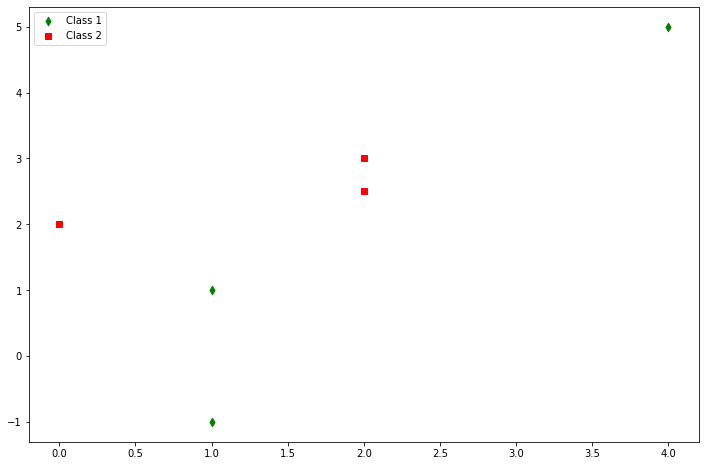

In [ ]:
# X & Y co-ordinates for class 1
x_train_1 = class_1[:,0]
y_train_1 = class_1[:,1]

# X & Y co-ordinates for class 2
x_train_2 = class_2[:,0]
y_train_2 = class_2[:,1]


plt.figure(figsize = (12, 8))

plt.scatter(x_train_1, y_train_1, marker='d', label = 'Class 1', color = 'green')
plt.scatter(x_train_2, y_train_2, marker='s', label = 'Class 2', color = 'red')

plt.legend()
plt.show()

# **Two classes are separated with a linear boundary**

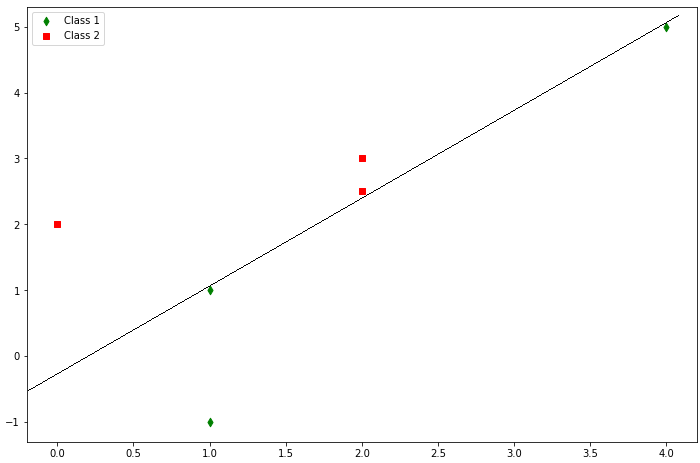

# ***Task 02***
Consider the case of a second order polynomial discriminant function. Generate the high dimensional sample points y, as discussed in the class.

In [ ]:
def func_y(x1,x2):
    return np.array([x1**2, x2**2, x1*x2, x1, x2, 1])

norm_class=[]

for row in class_1:
    norm_class.append(func_y(row[0],row[1])) 

for row in class_2:
    norm_class.append(np.dot(func_y(row[0],row[1]),-1)) #applying dot multiplication with -1 to class 1
  
norm_class = np.array(norm_class)
print("Normalized class:\n")
print(norm_class)

Normalized class:

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [ 0.   -4.    0.    0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]


# ***Task 3***

Use Perceptron Algorithm (both one at a time and many at a time) for finding the weightcoefficients of the discriminant function (i.e., values of w) boundary for your linear classifier in task 2.

Here α is the learning rate and 0 < α ≤ 1.

In [ ]:
w = np.zeros_like(norm_class[0])  

def ManyAAT(alpha, w):
    for itr in range(500):
        miscls = False;
        y_sum = np.zeros_like(norm_class[0])
        
        for i in range(len(norm_class)):
            val = np.dot(norm_class[i], w)
            
            if (val <= 0.0):
                miscls = True     #if value <= 0, then misclassified
                y_sum = y_sum + norm_class[i]   # sum y

        w = w + alpha * y_sum       # w = w(i) + alpha * sum y
        
        if (miscls == False):
            return itr + 1

    return -1 

In [ ]:
w=np.zeros_like(norm_class[0])

def OneAAT(alpha, w):
    for itr in range(500):
        miscls = False;  

        for i in range(len(norm_class)):
            val = np.dot(norm_class[i], w)

            if (val <= 0.0):
                miscls = True       #if value <= 0, then misclassified
                y_sum = np.zeros_like(norm_class[0])
                y_sum = y_sum + norm_class[i]   # sum y
                w = w + alpha * y_sum       # w = w(i) + alpha * sum y

        if (miscls == False):
            return itr + 1

    return -1